In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## The SD and Bell Shaped Curves

In [2]:
births = Table.read_table('baby.csv')

In [4]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

In [7]:
plus_one = np.mean(heights) + np.std(heights)
minus_one = np.mean(heights) - np.std(heights)
minus_one, plus_one

(61.52437830690309, 66.57442918883797)

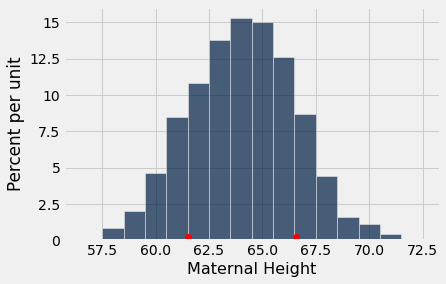

In [17]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))
plots.plot([minus_one, plus_one], [0.0025,0.0025], 'o', color='red');

## Central Limit Theorem ##

In [18]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


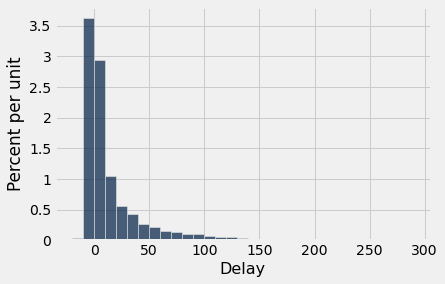

In [19]:
united.hist('Delay', bins=united_bins)

In [20]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [21]:
percentile(50, delays)

2

In [22]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [23]:
one_sample_mean(100)

15.24

In [24]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [25]:
sample_means_100 = ten_thousand_sample_means(100)

In [26]:
sample_means_100

array([13.75, 12.  , 20.1 , ..., 24.11, 14.77, 16.35])

In [27]:
len(sample_means_100)

10000

Population Average: 16.658155515370705


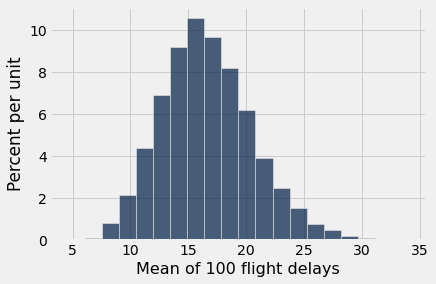

In [28]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)